In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sko.GA import GA

# 官方Demo
## 1.定义问题

In [22]:
def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.sin(x) - 0.5) / np.square(1 + 0.001 * x)

## 2.运行遗传算法

In [23]:
ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, lb=[-1, -1], ub=[1, 1], 
        precision=1e-7,prob_mut = 0.001)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [2.98023233e-08 2.98023233e-08] 
 best_y: [1.77635684e-15]


## 3.plot the result

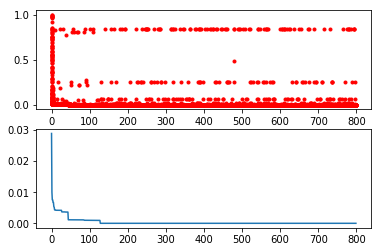

In [24]:
Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

## 4.加入一些约束条件的优化问题
官方给的demo里并没有给出怎么加约束条件，不过看一下源码和demo可以知道，下面就上面的问题给出一个例子。

源码关于等式约束和不等式约束的说明，源码的注释应该是写反了，这个包貌似主要是由作者一个大佬在维护，相对来说，没有那么成熟：

```python
# constraint:
self.has_constraint = len(constraint_eq) > 0 or len(constraint_ueq) > 0
self.constraint_eq = list(constraint_eq)  # a list of unequal constraint functions with c[i] <= 0
self.constraint_ueq = list(constraint_ueq)  # a list of equal functions with ceq[i] = 0
```

In [25]:
def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.sin(x) - 0.5) / np.square(1 + 0.001 * x)

In [26]:
# 定义等式约束和不等式约束
constraint_eq = [
    lambda x: 0.5 - x[0] - x[1]
]

# constraint_ueq = [
#     lambda x: 1 - x[0] * x[1],
#     lambda x: x[0] * x[1] - 5
# ]

In [27]:
ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, lb=[-1, -1], ub=[1, 1], 
        constraint_eq=constraint_eq , 
        precision=1e-7,prob_mut = 0.001)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [ 0.79146194 -0.29146192] 
 best_y: [0.65264884]


In [28]:
#验证与喜爱看看两个相加是不是0.5
sum(best_x)

0.5000000149011616

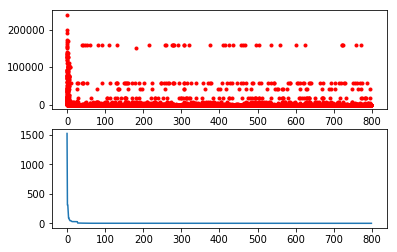

In [29]:
Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

## 5.涉及矩阵运算怎么办？
这边需要一提，这个包的function只能输入一维list，无法输入矩阵，那么目标函数以及约束条件需要用到矩阵运算怎么办，这边提供一个思路。

In [35]:
def schaffer(p):
    # 将一维的p转化为2维的矩阵
    x = p.reshape(2,2)
    return x[0][0] ** 2 + x[0][1] ** 2 + x[1][0] ** 2+ x[1][1] ** 2

In [36]:
# 定义等式约束和不等式约束
def constraint1(p):
    x = p.reshape(2,2)
    return (x[0][0] + x[0][1])
    
constraint_eq = [
    constraint1
]

In [37]:
ga = GA(func=schaffer, n_dim=4, size_pop=50, max_iter=800, lb=[-1,-1,-1,-1], ub=[1 ,1,1,1], 
        constraint_eq=constraint_eq , 
        precision=1e-7,prob_mut = 0.001)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [ 1.72964191e-01 -1.72964191e-01  2.98023233e-08 -2.98023233e-08] 
 best_y: [0.05983322]


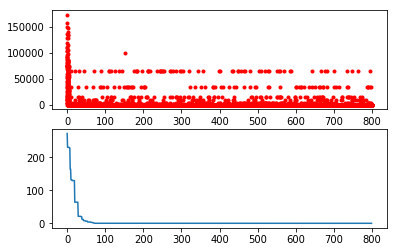

In [38]:
Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()